<a href="https://colab.research.google.com/github/Krahjotdaan/MachineLearning/blob/main/KNN_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Реализуем классификатор методом ближайших соседей

# Практика
## Задание 0
Реализуйте классификатор по приведенному шаблону

In [ ]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
def calc_distance(a, b):
    return sqrt(sum((a - b) ** 2))

Функция должна возвращать Евклидово расстояние между двумя точками в N-мерном пространстве(ее можно скопировать из работы по numpy)

In [ ]:
class KnnClassificator:

    def __init__(self, k):
        self.k = k
        self.X = []
        self.y = []

    # обучение модели
    def fit(self, X, y):
        self.X = X
        self.y = y

    # предсказание значения для нового объекта
    def predict(self, x_new):
        result = []
        for i, x in enumerate(self.X):
          dist = calc_distance(x, x_new)
          result.append({'dist': dist, 'class': self.y[i]})
        result = sorted(result, key = lambda x: x['dist'])
        k_nearest = result[:self.k]

        return Counter([obj['class'] for obj in k_nearest]).most_common()[0][0]

Метод predict должен возвращать самый популярный класс среди K ближайших соседей.

Подсказка: может пригодиться класс Counter из пакета collections.

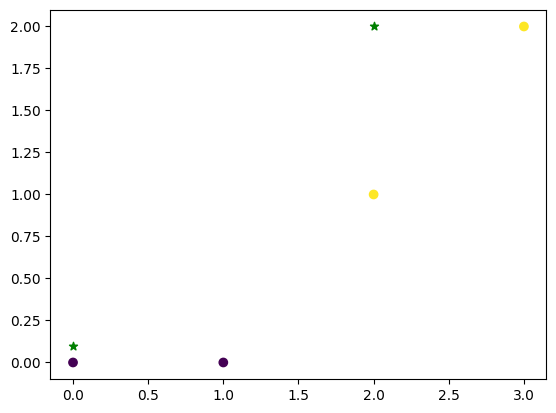

In [ ]:
X_t = np.array([[0, 0], [1, 0], [2,1], [3,2]])
y_t = [0,0,1,1]

plt.scatter(X_t[:, 0], X_t[:, 1], c=y_t)
plt.scatter([2,0], [2,0.1], c='g', marker='*')
plt.show()

In [ ]:
# Проверяем
knn = KnnClassificator(3)
knn.fit(X_t, y_t)
knn.predict([2, 2])
# Вывод должен быть 1

1

In [ ]:
# Проверяем
knn = KnnClassificator(3)
knn.fit(X_t, y_t)
knn.predict([0, 0.1])
# Вывод должен быть 0

0


## Многоклассовая классификация на четырехмерных данных

In [ ]:
X = np.array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [4.4, 3. , 1.3, 0.2],
       [5.1, 3.4, 1.5, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [4.5, 2.3, 1.3, 0.3],
       [4.4, 3.2, 1.3, 0.2],
       [5. , 3.5, 1.6, 0.6],
       [5.1, 3.8, 1.9, 0.4],
       [4.8, 3. , 1.4, 0.3],
       [5.1, 3.8, 1.6, 0.2],
       [4.6, 3.2, 1.4, 0.2],
       [5.3, 3.7, 1.5, 0.2],
       [5. , 3.3, 1.4, 0.2],
       [7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [6.5, 2.8, 4.6, 1.5],
       [5.7, 2.8, 4.5, 1.3],
       [6.3, 3.3, 4.7, 1.6],
       [4.9, 2.4, 3.3, 1. ],
       [6.6, 2.9, 4.6, 1.3],
       [5.2, 2.7, 3.9, 1.4],
       [5. , 2. , 3.5, 1. ],
       [5.9, 3. , 4.2, 1.5],
       [6. , 2.2, 4. , 1. ],
       [6.1, 2.9, 4.7, 1.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.7, 3.1, 4.4, 1.4],
       [5.6, 3. , 4.5, 1.5],
       [5.8, 2.7, 4.1, 1. ],
       [6.2, 2.2, 4.5, 1.5],
       [5.6, 2.5, 3.9, 1.1],
       [5.9, 3.2, 4.8, 1.8],
       [6.1, 2.8, 4. , 1.3],
       [6.3, 2.5, 4.9, 1.5],
       [6.1, 2.8, 4.7, 1.2],
       [6.4, 2.9, 4.3, 1.3],
       [6.6, 3. , 4.4, 1.4],
       [6.8, 2.8, 4.8, 1.4],
       [6.7, 3. , 5. , 1.7],
       [6. , 2.9, 4.5, 1.5],
       [5.7, 2.6, 3.5, 1. ],
       [5.5, 2.4, 3.8, 1.1],
       [5.5, 2.4, 3.7, 1. ],
       [5.8, 2.7, 3.9, 1.2],
       [6. , 2.7, 5.1, 1.6],
       [5.4, 3. , 4.5, 1.5],
       [6. , 3.4, 4.5, 1.6],
       [6.7, 3.1, 4.7, 1.5],
       [6.3, 2.3, 4.4, 1.3],
       [5.6, 3. , 4.1, 1.3],
       [5.5, 2.5, 4. , 1.3],
       [5.5, 2.6, 4.4, 1.2],
       [6.1, 3. , 4.6, 1.4],
       [5.8, 2.6, 4. , 1.2],
       [5. , 2.3, 3.3, 1. ],
       [5.6, 2.7, 4.2, 1.3],
       [5.7, 3. , 4.2, 1.2],
       [5.7, 2.9, 4.2, 1.3],
       [6.2, 2.9, 4.3, 1.3],
       [5.1, 2.5, 3. , 1.1],
       [5.7, 2.8, 4.1, 1.3],
       [6.3, 3.3, 6. , 2.5],
       [5.8, 2.7, 5.1, 1.9],
       [7.1, 3. , 5.9, 2.1],
       [6.3, 2.9, 5.6, 1.8],
       [6.5, 3. , 5.8, 2.2],
       [7.6, 3. , 6.6, 2.1],
       [4.9, 2.5, 4.5, 1.7],
       [7.3, 2.9, 6.3, 1.8],
       [6.7, 2.5, 5.8, 1.8],
       [7.2, 3.6, 6.1, 2.5],
       [6.5, 3.2, 5.1, 2. ],
       [6.4, 2.7, 5.3, 1.9],
       [6.8, 3. , 5.5, 2.1],
       [5.7, 2.5, 5. , 2. ],
       [5.8, 2.8, 5.1, 2.4],
       [6.4, 3.2, 5.3, 2.3],
       [6.5, 3. , 5.5, 1.8],
       [7.7, 3.8, 6.7, 2.2],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.2, 5. , 1.5],
       [6.9, 3.2, 5.7, 2.3],
       [5.6, 2.8, 4.9, 2. ],
       [7.7, 2.8, 6.7, 2. ],
       [6.3, 2.7, 4.9, 1.8],
       [6.7, 3.3, 5.7, 2.1],
       [7.2, 3.2, 6. , 1.8],
       [6.2, 2.8, 4.8, 1.8],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2.8, 5.6, 2.1],
       [7.2, 3. , 5.8, 1.6],
       [7.4, 2.8, 6.1, 1.9],
       [7.9, 3.8, 6.4, 2. ],
       [6.4, 2.8, 5.6, 2.2],
       [6.3, 2.8, 5.1, 1.5],
       [6.1, 2.6, 5.6, 1.4],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.4, 5.6, 2.4],
       [6.4, 3.1, 5.5, 1.8],
       [6. , 3. , 4.8, 1.8],
       [6.9, 3.1, 5.4, 2.1],
       [6.7, 3.1, 5.6, 2.4],
       [6.9, 3.1, 5.1, 2.3],
       [5.8, 2.7, 5.1, 1.9],
       [6.8, 3.2, 5.9, 2.3],
       [6.7, 3.3, 5.7, 2.5],
       [6.7, 3. , 5.2, 2.3],
       [6.3, 2.5, 5. , 1.9],
       [6.5, 3. , 5.2, 2. ],
       [6.2, 3.4, 5.4, 2.3],
       [5.9, 3. , 5.1, 1.8]])

Y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
X[0], Y[0]

(array([5.1, 3.5, 1.4, 0.2]), 0)

## Визуализация данных

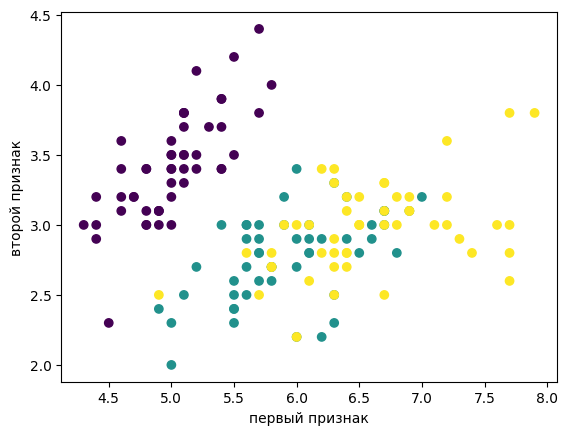

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('первый признак')
plt.ylabel('второй признак')
plt.show()

In [ ]:
plt.scatter(X[:, 2], X[:, 3], c=Y)
plt.xlabel('третий признак')
plt.ylabel('четвертый признак')
plt.show()

### Задание 1
Обучите классификатор с одним соседом и постройте предсказание для объекта [5,1,2,3]

In [ ]:
knn = KnnClassificator(150)
knn.fit(X, Y)
knn.predict([5,1,2,3])

1

### Задание 2

Обучите классификатор с k = 3 на заданной выборке.

Посчитайте качество с помощью метрики accuracy на этой же выборке.

In [ ]:
knn = KnnClassificator(3)
knn.fit(X, Y)
knn.predict([5,1,2,3])

1

Занятие 2

In [ ]:
XY = list(zip(X, Y))
np.random.shuffle(XY)
X_sh, y_sh = zip(*XY)

In [ ]:
X_train = X_sh[:int(len(X_sh) * 0.75)]
y_train = y_sh[:int(len(y_sh) * 0.75)]
X_test = X_sh[int(len(X_sh) * 0.75):]
y_test = y_sh[int(len(y_sh) * 0.75):]

In [ ]:
def accuracy(y_pred, y_true):
  s = 0
  for i in range(len(y_true)):
    if y_pred[i] == y_true[i]:
      s += 1
  return s / len(y_true)

In [ ]:
acc_train = []
acc_test = []

for k in range(1, 51):
  knn = KnnClassificator(k)
  knn.fit(X_train, y_train)

  y_pr_train = [knn.predict(x) for x in X_train]
  y_pr_test = [knn.predict(x) for x in X_test]

  acc_tr = accuracy(y_pr_train, y_train)
  acc_te = accuracy(y_pr_test, y_test)

  acc_train.append(acc_tr)
  acc_test.append(acc_te)

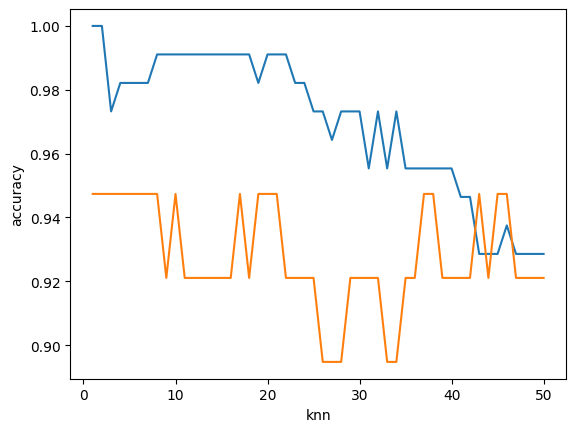

In [ ]:
x = np.arange(1, len(acc_train) + 1)
plt.plot(x, acc_train)
plt.plot(x, acc_test)
plt.xlabel('knn')
plt.ylabel('accuracy');

Sklearn


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=16)

In [ ]:
knn = KNeighborsClassifier(8)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.94

In [ ]:
from sklearn.model_selection import cross_val_score
#knn = KNeighborsClassifier(8)
#cross_val_score(knn, X, Y, cv = 5).mean()

In [ ]:
acc = []
for k in range(1, 151):
  knn = KNeighborsClassifier(k)
  acc.append(cross_val_score(knn, X, Y, cv = 5).mean())

x = np.arange(1, len(X) + 1)
plt.plot(x, acc)
plt.xlabel('knn')
plt.ylabel('accuracy');

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=16)
acc = []
for k in range(1, 80):
  knn = KNeighborsClassifier(k)
  acc.append(cross_val_score(knn, X_train, y_train, cv = 5).mean())
print(max(acc), acc.index(max(acc)) + 1)
knn = KNeighborsClassifier(acc.index(max(acc)) + 1)
print(cross_val_score(knn, X_test, y_test, cv = 5).mean())


0.9833333333333334 16
0.7333333333333333
